# Comparison of SP and 1RSB

In [100]:
using StaticArrays
include("../code/headers.jl")

In [61]:
function plotProb(p::AbstractArray, args...; kw...)
   pl = Plots.bar(collect(eachindex(p)), p.parent, args...; kw...) 
end

plotProb (generic function with 2 methods)

# 1. At fixed rate

In [28]:
m = factorial(7)
R = 0.25
r = 1 - 3R
# r = 0.1
# R = (1-r)/3
n = round(Int, 3m/(2+r))
r,n

(0.25, 6720)

In [77]:
Λ = OffsetVector([0,0,1-r,r], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
nedges = 3m
# convert to edge degree convention to express the degree profile
lambda, rho = nodes2edges(Λ[1:end], K[1:end])
# build graph
H = ldpc_graphGF2(n,m,nedges,lambda,rho).H
x0 = rand((0,1), size(H,2))
s = (-1).^x0
J = 20
init=OffsetArray(MVector{2J+1}(fill(1/(2J+1),2J+1)), -J:J)
y = 0.5
sp = survey_propagation(H; field=s, init, y=y);

Run SP

In [78]:
callback(t, ε, sp) = (println("$t $ε"); false)
iteration!(sp, maxiter=1000, damp=0.5, callback=callback, tol=1e-6)

1 0.975609756097561
2 0.4878048780487805
3 0.4878048780487803
4 0.37175975155229
5 0.28384526815820776
6 0.22871975342077844
7 0.19287214282187243
8 0.14893744311123047
9 0.12160813761779493
10 0.10433454017583471
11 0.1119538806978152
12 0.10791267893455733
13 0.1043609751534969
14 0.10155254567819483
15 0.10116166372898522
16 0.09591098963636524
17 0.08679953825832842
18 0.07504468217978798
19 0.06198050751143732
20 0.048893208551720885
21 0.03966512179294429
22 0.039583117485879116
23 0.04014001167849701
24 0.040034940812059966
25 0.039310904256008805
26 0.038096206577999114
27 0.036503688021711556
28 0.034708135748797275
29 0.034906112116294574
30 0.03501274112150149
31 0.03503243626287589
32 0.034967961929278424
33 0.03482037957344225
34 0.03458935888840864
35 0.034273701243687116
36 0.03387194254214476
37 0.03359581435889425
38 0.03394213242800875
39 0.03410395204087613
40 0.0340881909160326
41 0.033904691583348134
42 0.03356546752561701
43 0.03308409995605999
44 0.03247525997141

329 1.4484877533527118e-6
330 1.416037661516878e-6
331 1.3820021325106069e-6
332 1.3465719122529585e-6
333 1.3099301855445944e-6
334 1.283079728742198e-6
335 1.2592606056793798e-6
336 1.2333486304472174e-6
337 1.2055641069874667e-6
338 1.1761203326798864e-6
339 1.1452232076547553e-6
340 1.1130708771345255e-6
341 1.079853414298615e-6
342 1.0457525418949842e-6
343 1.0109413967063219e-6
344 9.755843384806617e-7


Run population dynamics

In [ ]:
popsize=10^6
popP = fill(1/(2J+1), -J:J, 1:popsize)
popQ = fill(1/(2J+1), -J:J, 1:popsize);

In [79]:
ProgressMeter.ijulia_behavior(:clear)
popP, popQ = RSB(Λ,K; J=J, maxiter=10^2, popsize=popsize, y=y)

Progress: 100%|█████████████████████████████████████████| Time: 0:03:00
  err:  0.0005010621277658917/5.0e-5


err = 0.0005010621277658917


([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0… ; ], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0… ; ])

Compare

In [80]:
avgP = mean(sp.P)
varP = mean(var(sp.P))
avgPopP = mean(popP, dims=2)[:,1]
varPopP = mean(var(popP, dims=2))
varP, varPopP

(0.0037539175321087896, 0.0038095631281436578)

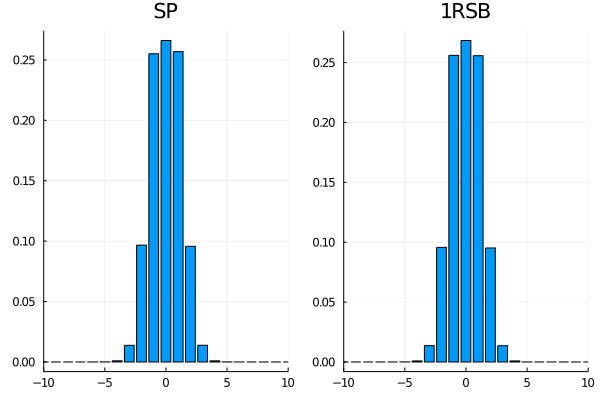

In [81]:
h1 = plotProb(avgP, title="SP", label="", xlim=(-10,10))
h2 = plotProb(avgPopP, title="1RSB", label="", xlim=(-10,10))
Plots.plot(h1,h2)

## Overlap

In [103]:
o_sp = overlap(sp)

0.5305517467800169

In [ ]:
o_rsb,_,_ = overlap1RSB(Λ,K; popP=popP, popQ=popQ, y=y, samples=10^6)

Progress:  37%|███████████████                          |  ETA: 0:00:24
  F:  -0.03976727025226336
  O:  0.5299715785436739
  D:  0.23501421072816303